C:\Users\Leo\Anaconda3\envs\tensorflow-gpu\lib\site-packages\ipykernel_launcher.py:24: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead


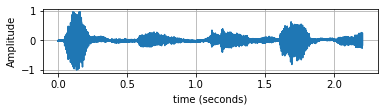

In [48]:
import wave
import matplotlib.pyplot as plt
import numpy as np

# 開啟WAV音訊
f = wave.open(r"C:\Users\Leo\Desktop\910-2-14-0-10db-noise-15dB.wav", "rb")

# 讀取格式資訊
# (聲道數、量化位數、取樣頻率、取樣點數、壓縮型別、壓縮型別的描述)
# (nchannels, sampwidth, framerate, nframes, comptype, compname)
params = f.getparams()
nchannels, sampwidth, framerate, nframes = params[:4]
# nchannels通道數 = 2
# sampwidth量化位數 = 2
# framerate取樣頻率 = 22050
# nframes取樣點數 = 53395

# 讀取nframes個數據，返回字串格式
str_data = f.readframes(nframes)

f.close()

#將字串轉換為陣列，得到一維的short型別的陣列
wave_data = np.fromstring(str_data, dtype=np.short)

# 賦值的歸一化
wave_data = wave_data*1.0/(max(abs(wave_data)))

# 整合左聲道和右聲道的資料
wave_data = np.reshape(wave_data,[nframes,nchannels])
# wave_data.shape = (-1, 2)   # -1的意思就是沒有指定,根據另一個維度的數量進行分割

# 最後通過取樣點數和取樣頻率計算出每個取樣的時間
time = np.arange(0, nframes) * (1.0 / framerate)

plt.figure()
# 左聲道波形
plt.subplot(3,1,1)
plt.plot(time, wave_data[:,0])
plt.xlabel("time (seconds)")
plt.ylabel("Amplitude")
#plt.title("Left channel")
plt.grid()  # 標尺

#plt.subplot(3,1,3)


plt.show()

In [50]:
import librosa
x , sr = librosa.load("910-2-14-0-10db-noise-15dB.wav", sr=8000)
print(x.shape, sr)

(17657,) 8000


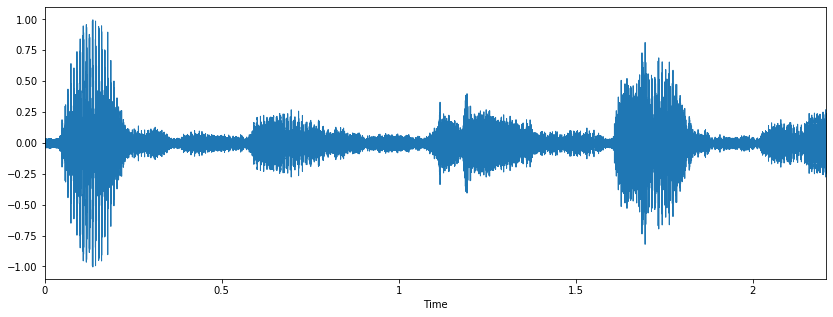

In [51]:
%matplotlib inline
import matplotlib.pyplot as plt
import librosa.display
plt.figure(figsize=(14, 5))
librosa.display.waveplot(x, sr=sr)

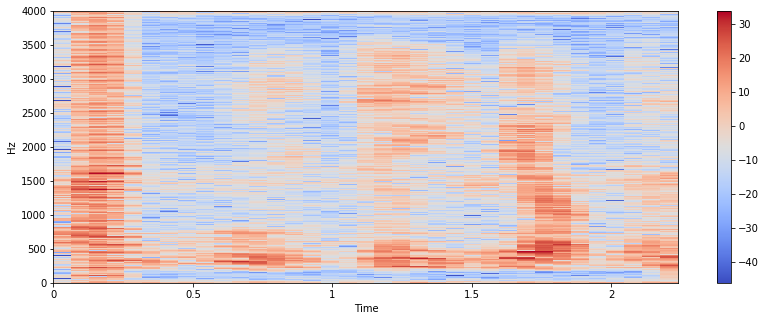

In [52]:
X = librosa.stft(x)
Xdb = librosa.amplitude_to_db(abs(X))   # 把幅度轉成分貝格式
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar()

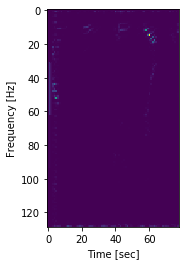

In [45]:
import matplotlib.pyplot as plt
from scipy import signal
from scipy.io import wavfile
sample_rate, samples = wavfile.read('910-2-14-0-10db-noise-0dB.wav')
frequencies, times, spectrogram = signal.spectrogram(samples, sample_rate)
plt.pcolormesh(times, frequencies, spectrogram)
plt.imshow(spectrogram)
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()